## K-Mean Clustering

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cluster import KMeans

In [10]:
wine = pd.read_csv('data/wine.csv', header=0)
wine_cluster = pd.read_csv('data/wine.csv', header=0)

In [11]:
wine.head()

Wine  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0     1    14.23        1.71  2.43                 15.6        127   
1     1    13.20        1.78  2.14                 11.2        100   
2     1    13.16        2.36  2.67                 18.6        101   
3     1    14.37        1.95  2.50                 16.8        113   
4     1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              
0             5.64  1.04                          3.92                 1065  
1             4.38  1.05                          3.40                 1050  
2             5.68  1.03                          3.17                 1185  
3             7.80  0.86                          3.45                 1480  
4             4.32  1.04                          2.93                  735

In [12]:
wine = wine['Wine']

In [13]:
wine_cluster = wine_cluster.drop(['Wine'], axis=1) 

In [14]:
wine = pd.DataFrame(wine)
wine

Wine
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
..    ...
148     3
149     3
150     3
151     3
152     3
153     3
154     3
155     3
156     3
157     3
158     3
159     3
160     3
161     3
162     3
163     3
164     3
165     3
166     3
167     3
168     3
169     3
170     3
171     3
172     3
173     3
174     3
175     3
176     3
177     3

[178 rows x 1 columns]

In [15]:
def winename(c):
    if c['Wine'] == 1:
        return "Borola"
    elif c['Wine'] == 2:
        return "Barbera"
    else:
        return "Grignolino"
        
        
wine['WineName'] = wine.apply(winename, axis=1)

In [16]:
wine.head()

Wine WineName
0     1   Borola
1     1   Borola
2     1   Borola
3     1   Borola
4     1   Borola

In [17]:
model = KMeans(n_clusters=3)

In [18]:
model.fit(wine_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
labels = model.predict(wine_cluster)

In [20]:
print(model.inertia_)

2370689.68678


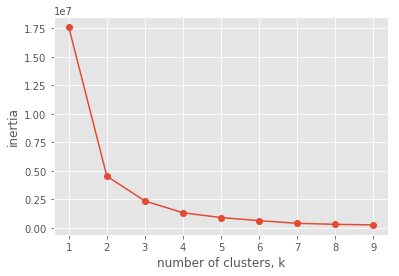

In [21]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(wine_cluster)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [22]:
labels = pd.DataFrame(labels)
labels.columns = ['label']

In [23]:
result = pd.concat([labels, wine], axis=1, join='inner')

In [25]:
result.head()

label  Wine WineName
0      1     1   Borola
1      1     1   Borola
2      1     1   Borola
3      1     1   Borola
4      2     1   Borola

In [24]:
ct = pd.crosstab(result['label'], result['WineName'])
ct

WineName  Barbera  Borola  Grignolino
label                                
0              50       0          19
1               1      46           0
2              20      13          29

## Using Standard Scaler to find clusters

Standardize features by removing the mean and scaling to unit variance
<br><br>Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.
<br><br> Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaler.fit(wine_cluster)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
samples_scaled = scaler.transform(wine_cluster)

In [29]:
samples_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ..., 
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [30]:
model2 = KMeans(n_clusters=3)

In [31]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, model2)

In [32]:
pipeline.fit(wine_cluster)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [33]:
labels2 = pipeline.predict(wine_cluster)

In [34]:
labels2 = pd.DataFrame(labels2)
labels2.columns = ['label']

In [35]:
result = pd.concat([labels2, wine], axis=1, join='inner')

In [36]:
ct = pd.crosstab(result['label'], result['WineName'])
ct

WineName  Barbera  Borola  Grignolino
label                                
0               3       0          48
1               3      59           0
2              65       0           0